# 📊 Spotify Wrapped – Data Analysis & Visualization

In [65]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone

plt.style.use("default")
sns.set_context("notebook")


In [2]:

df = pd.read_csv(r"D:\codes\Datasets\Liked_Songs.csv")
df.head()


,Track URI,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Explicit,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,spotify:track:4IvZLDtwBHmBmwgDIUbuwa,Here Comes Your Man,Doolittle,Pixies,1989-04-17,201186,74,False,NaN,2026-01-15T04:38:19Z,...,2,-10.865,1,0.0285,0.00772,0.078100,0.4010,0.882,124.594,4
1,spotify:track:5ihS6UUlyQAfmp48eSkxuQ,Landslide,Fleetwood Mac,Fleetwood Mac,1975-07-11,199493,87,False,NaN,2026-01-15T04:38:07Z,...,7,-22.320,0,0.0318,0.88300,0.000223,0.1170,0.423,159.375,4
2,spotify:track:0qRR9d89hIS0MHRkQ0ejxX,Rich Girl,Bigger Than Both Of Us,Daryl Hall & John Oates,1976-08-01,142786,78,False,NaN,2026-01-11T13:21:54Z,...,5,-6.644,1,0.1760,0.46100,0.000000,0.0935,0.817,169.519,4
3,spotify:track:52ksVOpMCbimktgmI59GSq,While My Guitar Gently Weeps - Live from Madis...,Let It Roll - Songs of George Harrison,George Harrison,2009-01-01,286733,55,False,NaN,2026-01-09T13:49:55Z,...,7,-6.552,1,0.0292,0.00341,0.010200,0.7420,0.686,134.245,4
4,spotify:track:5Ts1DYOuouQLgzTaisxWYh,Love Grows (Where My Rosemary Goes),Love Grows (Where My Rosemary Goes) & Other Gems,Edison Lighthouse,1970-01-01,174760,74,False,NaN,2026-01-05T03:48:42Z,...,9,-4.613,1,0.0299,0.40300,0.000000,0.0855,0.753,108.625,4


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track URI         1001 non-null   object 
 1   Track Name        998 non-null    object 
 2   Album Name        998 non-null    object 
 3   Artist Name(s)    998 non-null    object 
 4   Release Date      1001 non-null   object 
 5   Duration (ms)     1001 non-null   int64  
 6   Popularity        1001 non-null   int64  
 7   Explicit          1001 non-null   bool   
 8   Added By          0 non-null      float64
 9   Added At          1001 non-null   object 
 10  Genres            790 non-null    object 
 11  Record Label      998 non-null    object 
 12  Danceability      1001 non-null   float64
 13  Energy            1001 non-null   float64
 14  Key               1001 non-null   int64  
 15  Loudness          1001 non-null   float64
 16  Mode              1001 non-null   int64  


In [4]:

df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["Added At"] = pd.to_datetime(df["Added At"], errors="coerce")
df["Release Year"] = df["Release Date"].dt.year

df["Genres"] = df["Genres"].fillna("")
df["Genres_List"] = df["Genres"].apply(lambda x: [g.strip() for g in x.split(",") if g])


## Top Artists

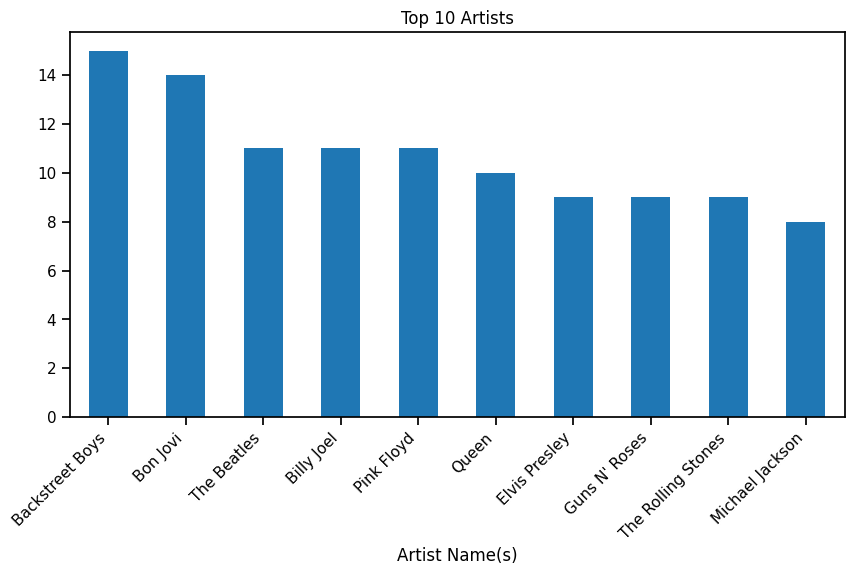

In [5]:

top_artists = df["Artist Name(s)"].value_counts().head(10)
top_artists.plot(kind="bar", figsize=(10,5), title="Top 10 Artists")
plt.xticks(rotation=45, ha="right")
plt.show()


## Top Albums

In [6]:
df["Release Year"].isna().sum()

np.int64(73)

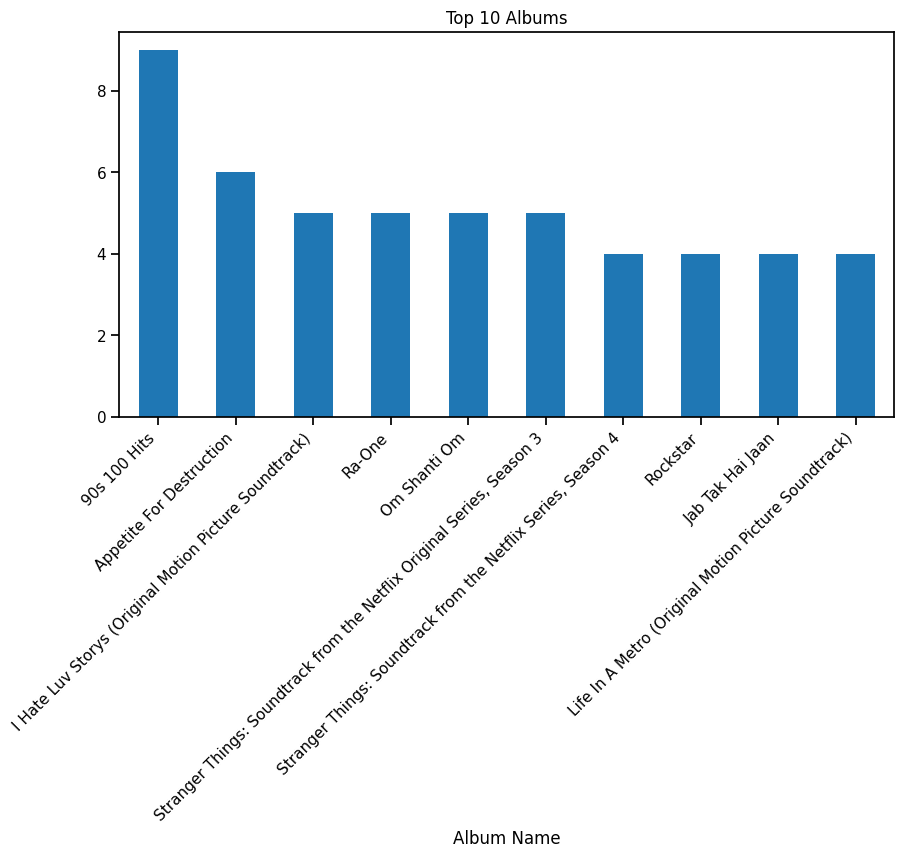

In [7]:

top_albums = df["Album Name"].value_counts().head(10)
top_albums.plot(kind="bar", figsize=(10,5), title="Top 10 Albums")
plt.xticks(rotation=45, ha="right")
plt.show()


## Top Genres

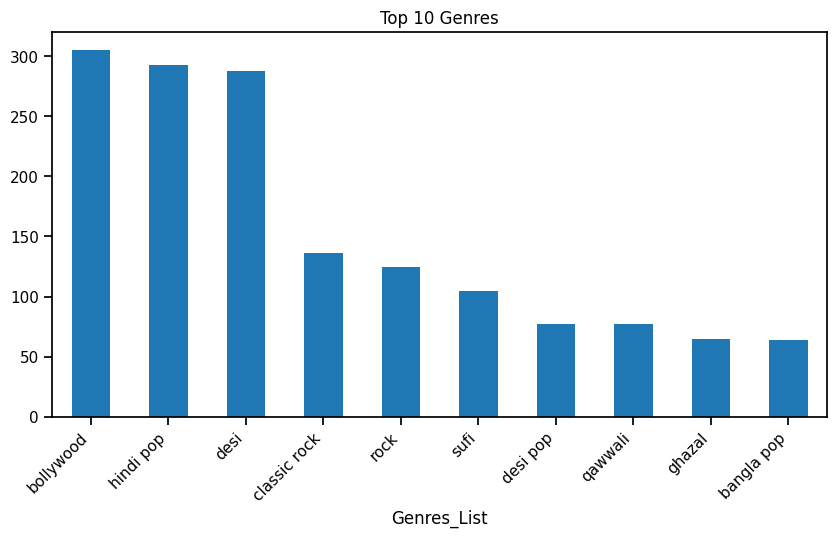

In [8]:

top_genres = df.explode("Genres_List")["Genres_List"].value_counts().head(10)
top_genres.plot(kind="bar", figsize=(10,5), title="Top 10 Genres")
plt.xticks(rotation=45, ha="right")
plt.show()


## Popularity Analysis

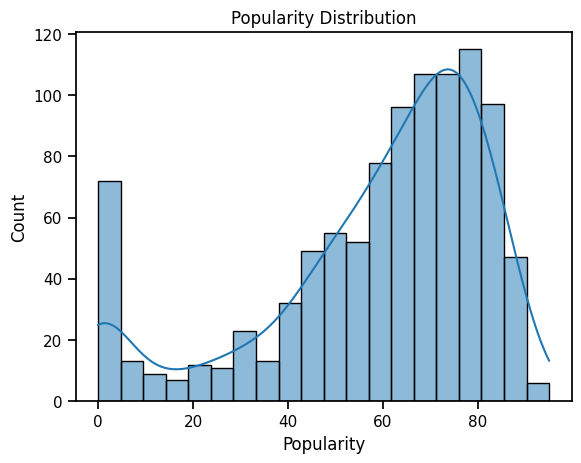

In [10]:

sns.histplot(df["Popularity"], bins=20, kde=True)
plt.title("Popularity Distribution")
plt.show()


## Correlation Heatmap

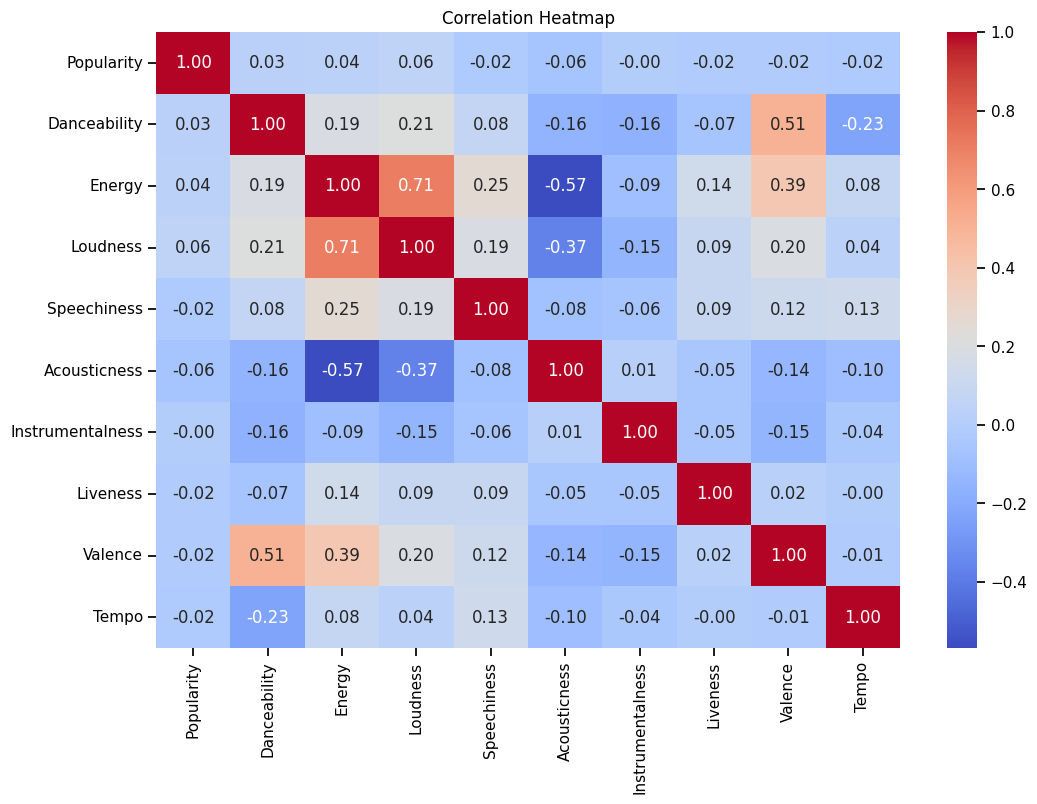

In [12]:

audio_features = [
    "Danceability", "Energy", "Loudness",
    "Speechiness", "Acousticness",
    "Instrumentalness", "Liveness",
    "Valence", "Tempo"
]

corr = df[["Popularity"] + audio_features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Mood Analysis

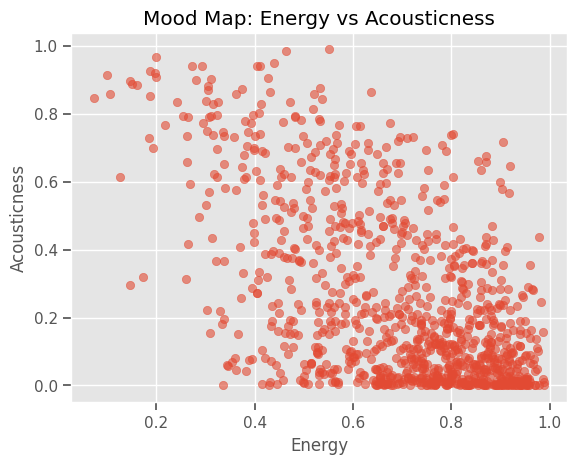

In [25]:

plt.scatter(df["Energy"], df["Acousticness"], alpha=0.6)
plt.xlabel("Energy")
plt.ylabel("Acousticness")
plt.title("Mood Map: Energy vs Acousticness")
plt.show()


## Explicit Content Analysis

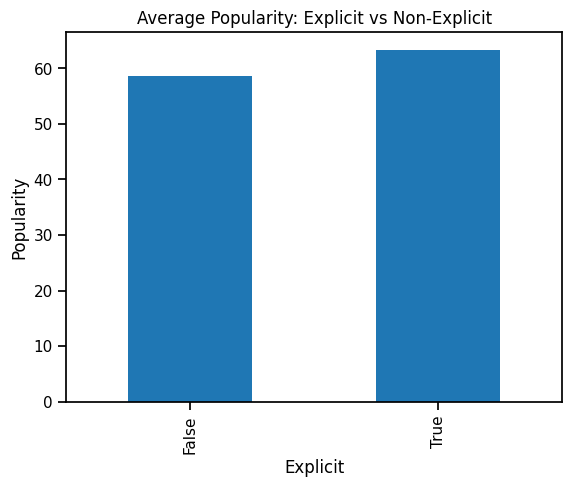

In [14]:

df.groupby("Explicit")["Popularity"].mean().plot(kind="bar")
plt.title("Average Popularity: Explicit vs Non-Explicit")
plt.ylabel("Popularity")
plt.show()


## Listening Trend Over Time

C:\Users\Shreshth Kabra\AppData\Local\Temp\ipykernel_157160\123564800.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["Added Month"] = df["Added At"].dt.to_period("M")


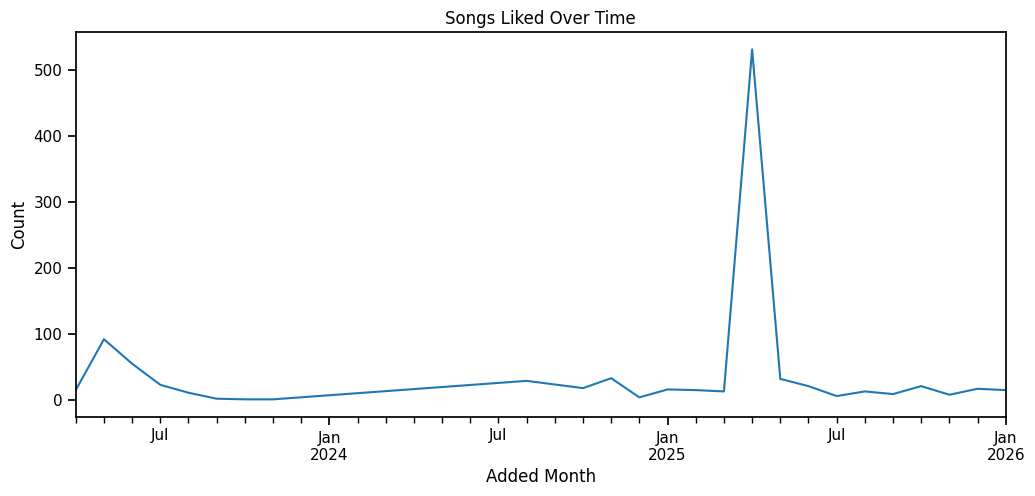

In [15]:

df["Added Month"] = df["Added At"].dt.to_period("M")
df.groupby("Added Month").size().plot(figsize=(12,5))
plt.title("Songs Liked Over Time")
plt.ylabel("Count")
plt.show()


## Audio Feature Profile

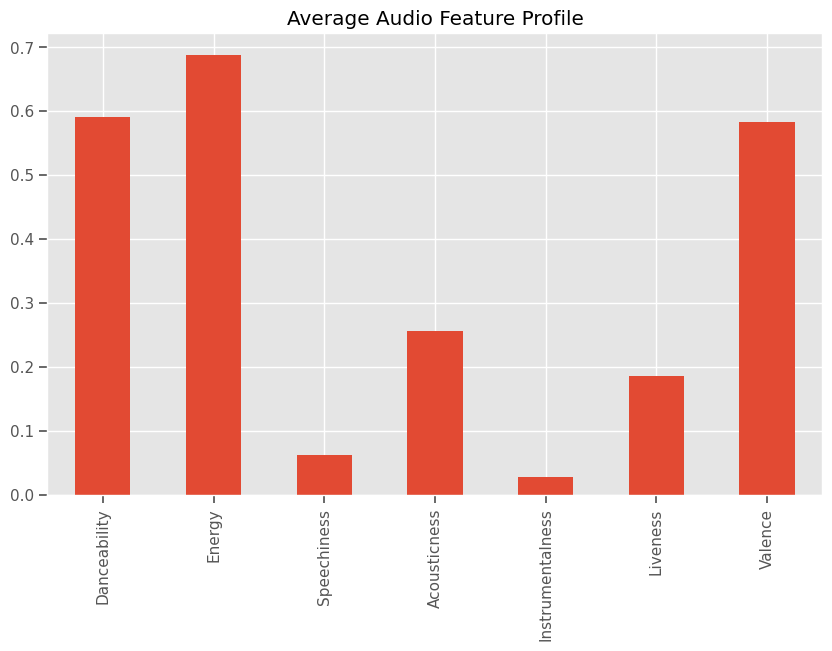

In [32]:
df[audio_features].mean().plot(kind="bar", figsize=(10,6))
plt.title("Average Audio Feature Profile")
plt.show()

In [38]:
# ML Model for Mood Prediction
# This section implements a machine learning model to predict song moods based on audio features

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pickle

# Define features for the model
FEATURES = [
    'Danceability',
    'Energy',
    'Loudness',
    'Speechiness',
    'Acousticness',
    'Instrumentalness',
    'Liveness',
    'Valence',
    'Tempo'
]

# Function to assign mood labels based on audio features
def assign_mood(row):
    try:
        if pd.isna(row['Valence']) or pd.isna(row['Energy']) or pd.isna(row['Acousticness']) or pd.isna(row['Tempo']):
            return 'Sad'  # Default mood if any required value is missing
            
        if float(row['Valence']) > 0.6 and float(row['Energy']) > 0.6:
            return 'Happy'
        elif float(row['Energy']) < 0.4 and float(row['Acousticness']) > 0.5:
            return 'Chill'
        elif float(row['Energy']) > 0.7 and float(row['Tempo']) > 120:
            return 'Energetic'
        else:
            return 'Sad'
    except Exception as e:
        print(f"Error processing row: {e}")
        return 'Sad'  # Default mood on error

# Create mood labels
df['Mood'] = df.apply(assign_mood, axis=1)

# Display the distribution of moods
print("Mood Distribution:")
print(df['Mood'].value_counts())

# Prepare features and target
X = df[FEATURES].copy()
y = df['Mood'].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=69, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the model and scaler for future use
# with open("spotify_mood_model.pkl", "wb") as f:
#     pickle.dump(model, f)

# with open("spotify_scaler.pkl", "wb") as f:
#     pickle.dump(scaler, f)

# print("\nModel and scaler have been saved successfully!")

# Display the first few predictions
predictions_df = X_test.copy()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_pred
print("\nSample Predictions:")
print(predictions_df[['Actual', 'Predicted']].head())

Mood Distribution:
Mood
Sad          422
Happy        413
Energetic    106
Chill         60
Name: count, dtype: int64

Model Evaluation:
Accuracy: 0.8304

Classification Report:
              precision    recall  f1-score   support

       Chill       0.84      0.67      0.74        24
   Energetic       0.66      0.49      0.56        43
       Happy       0.89      0.93      0.91       165
         Sad       0.80      0.85      0.82       169

    accuracy                           0.83       401
   macro avg       0.80      0.73      0.76       401
weighted avg       0.83      0.83      0.83       401


Sample Predictions:
        Actual  Predicted
657      Happy      Happy
117      Happy      Happy
75       Happy      Happy
667      Chill      Chill
378        Sad        Sad
686      Happy      Happy
885      Happy      Happy
52       Chill      Chill
839        Sad        Sad
42       Happy      Happy
512      Happy      Happy
842      Happy      Happy
45       Happy        Sad
12

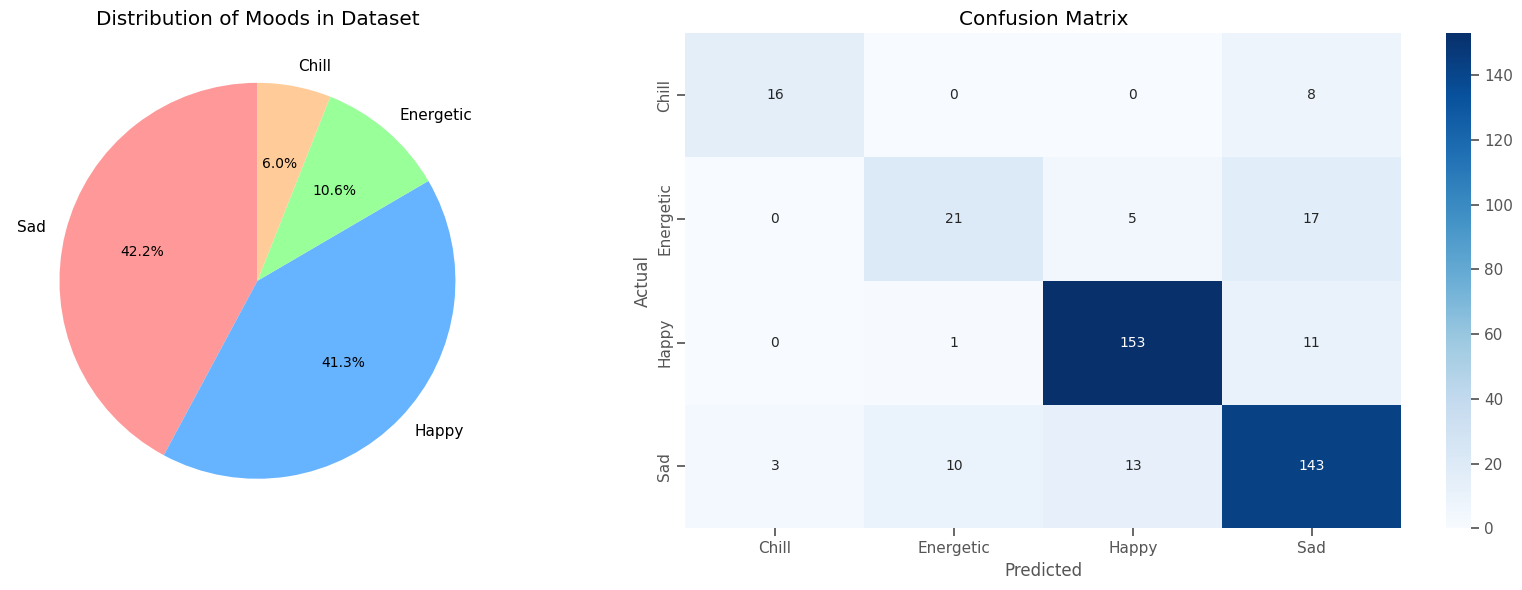

In [20]:
# Visualize mood distribution and model performance
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set style
plt.style.use('ggplot')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot mood distribution
mood_counts = df['Mood'].value_counts()
ax1.pie(mood_counts, labels=mood_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['#FF9999','#66B3FF','#99FF99','#FFCC99'])
ax1.set_title('Distribution of Moods in Dataset')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_, ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Confusion Matrix')

plt.tight_layout()
plt.show()

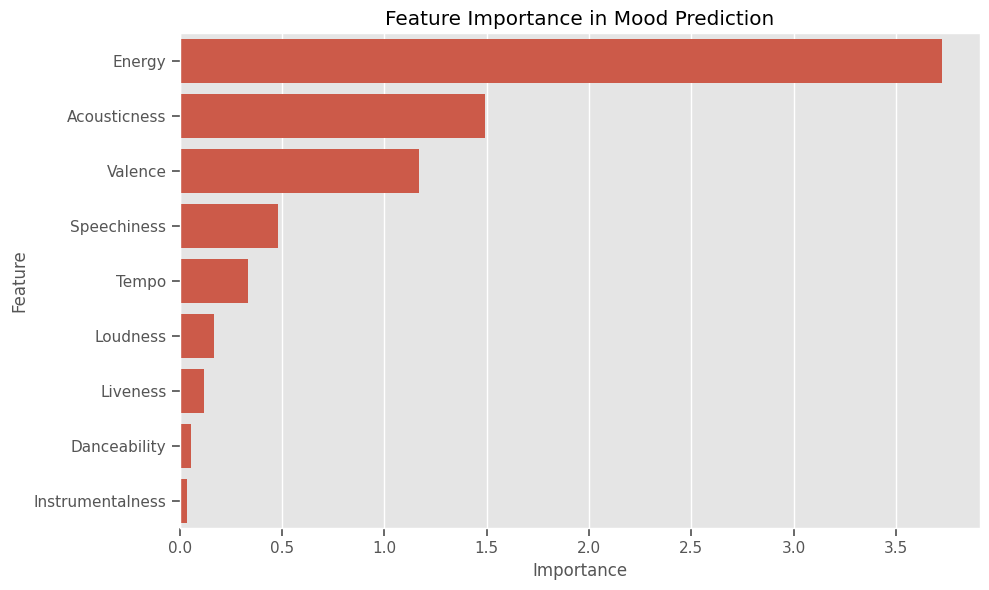

In [21]:
# Analyze feature importance
feature_importance = pd.DataFrame({
    'Feature': FEATURES,
    'Importance': abs(model.coef_[0])  # Take absolute value of coefficients
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Mood Prediction')
plt.tight_layout()
plt.show()

In [22]:
def predict_mood(features_dict, model_path="spotify_mood_model.pkl", scaler_path="spotify_scaler.pkl"):
    """
    Predict mood for new song features
    
    Parameters:
    features_dict (dict): Dictionary containing the audio features
    model_path (str): Path to the saved model
    scaler_path (str): Path to the saved scaler
    
    Returns:
    str: Predicted mood
    """
    
    # Load the model and scaler
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)
    
    # Convert features to DataFrame
    features_df = pd.DataFrame([features_dict])
    
    # Ensure all required features are present
    for feature in FEATURES:
        if feature not in features_df.columns:
            raise ValueError(f"Missing feature: {feature}")
    
    # Scale the features
    features_scaled = scaler.transform(features_df[FEATURES])
    
    # Make prediction
    prediction = model.predict(features_scaled)[0]
    prediction_proba = model.predict_proba(features_scaled)[0]
    
    # Create a dictionary of mood probabilities
    mood_probs = {model.classes_[i]: f"{prob*100:.2f}%" for i, prob in enumerate(prediction_proba)}
    
    return prediction, mood_probs

# Example usage:
sample_song = {
    'Danceability': 0.7,
    'Energy': 0.8,
    'Loudness': -5.0,
    'Speechiness': 0.03,
    'Acousticness': 0.1,
    'Instrumentalness': 0.0,
    'Liveness': 0.1,
    'Valence': 0.9,
    'Tempo': 120
}
mood, probs = predict_mood(sample_song)
print(f"Predicted Mood: {mood}")
print("Probabilities:", probs)

Predicted Mood: Happy
Probabilities: {'Chill': '0.00%', 'Energetic': '0.07%', 'Happy': '99.38%', 'Sad': '0.55%'}


In [37]:
sample_song = {
    'Danceability': 0.1,
    'Energy': 0.3,
    'Loudness': 0.2,
    'Speechiness': 0.01,
    'Acousticness': 0.5,
    'Instrumentalness': 0.0,
    'Liveness': 0.1,
    'Valence': 0.9,
    'Tempo': 80
}
mood, probs = predict_mood(sample_song)
print(f"Predicted Mood: {mood}")
print("Probabilities:", probs)

Predicted Mood: Sad
Probabilities: {'Chill': '4.20%', 'Energetic': '0.00%', 'Happy': '15.61%', 'Sad': '80.19%'}


In [39]:
df.columns

Index(['Track URI', 'Track Name', 'Album Name', 'Artist Name(s)',
       'Release Date', 'Duration (ms)', 'Popularity', 'Explicit', 'Added By',
       'Added At', 'Genres', 'Record Label', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Release Year',
       'Genres_List', 'age', 'Popularity Class', 'Added Month', 'Mood'],
      dtype='object')

## Listener Age Estimation

In [67]:
def calculate_listening_age(df):
    current_year = datetime.now().year
    df["age"] = current_year - df["Release Year"] 
    median_release_year = df["Release Year"].mean()
    listener_age_estimate = df["age"].mean().round().astype(int)
    return listener_age_estimate

age = calculate_age(df)

print(f"Your listening age: {age}")

Your listening age: 23


In [46]:
df["Popularity Class"]

0         High
1         High
2         High
3       Medium
4         High
         ...  
996        Low
997        Low
998        Low
999     Medium
1000       Low
Name: Popularity Class, Length: 1001, dtype: object

## Popularity Class Estimation

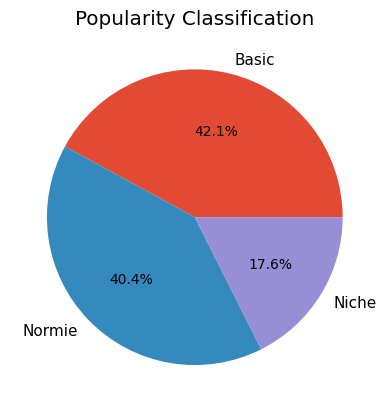

In [50]:
def popularity_class(p):
    if p >= 70:
        return "Basic"
    elif p >= 40:
        return "Normie"
    else:
        return "Niche"

df["Popularity Class"] = df["Popularity"].apply(popularity_class)
df["Popularity Class"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Popularity Classification")
plt.ylabel("")
plt.show()


In [52]:
df.columns

Index(['Track URI', 'Track Name', 'Album Name', 'Artist Name(s)',
       'Release Date', 'Duration (ms)', 'Popularity', 'Explicit', 'Added By',
       'Added At', 'Genres', 'Record Label', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Release Year',
       'Genres_List', 'age', 'Popularity Class', 'Added Month', 'Mood'],
      dtype='object')

## Playlist Age Estimation

In [70]:
from datetime import datetime, timezone

def calculate_playlist_age(df): 
    # Sort timestamps and get the oldest one (first added song)
    first_addn_time = df['Added At'].sort_values().iloc[0]

    # Make current time timezone-aware to match first_addn_time
    current_time = datetime.now(timezone.utc)  # Using UTC to match typical API timezones

    # Calculate time difference in years with 2 decimal places
    time_diff = (current_time - first_addn_time).total_seconds() / (365.25 * 24 * 60 * 60)
    formatted_diff = f"{time_diff:.2f}"

    return formatted_diff

    # print(f"First song added on: {first_addn_time}")
    # print(f"Current time: {current_time}")
    # print(f"Time difference: {formatted_diff} years")

age = calculate_playlist_age(df)
print(age, "years since you added your first song")

2.74 years since you added your first song


In [88]:
def plot_mood_radar(probabilities, title='Mood Prediction Probabilities', figsize=(8, 8), 
                   color='#1DB954', alpha=0.3, show_values=True, grid_color='gray'):
    """
    Create a radar chart to visualize model prediction probabilities.
    
    Parameters:
    -----------
    probabilities : dict
        Dictionary with category names as keys and probability values (0-1) as values
        Example: {'Happy': 0.6, 'Sad': 0.1, 'Chill': 0.2, 'Energetic': 0.7}
    
    title : str, optional
        Title of the radar chart (default: 'Mood Prediction Probabilities')
    
    figsize : tuple, optional
        Figure size as (width, height) (default: (8, 8))
    
    color : str, optional
        Color for the plot line and fill (default: '#1DB954' - Spotify green)
    
    alpha : float, optional
        Transparency of the filled area (0-1) (default: 0.3)
    
    show_values : bool, optional
        Whether to show probability values on the chart (default: True)
    
    grid_color : str, optional
        Color for the grid lines (default: 'gray')
    
    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    
    # Extract categories and values
    categories = list(probabilities.keys())
    values = list(probabilities.values())
    N = len(categories)
    
    # Create angles for each category
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    
    # Complete the circle by appending the first value
    values += values[:1]
    angles += angles[:1]
    
    # Create the figure
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))
    
    # Plot the data
    ax.plot(angles, values, 'o-', linewidth=2.5, color=color, markersize=8)
    ax.fill(angles, values, alpha=alpha, color=color)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=11, weight='bold')
    
    # Customize radial axis
    ax.set_ylim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], size=9, color=grid_color)
    
    # Grid styling
    ax.grid(True, color=grid_color, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.spines['polar'].set_color(grid_color)
    ax.spines['polar'].set_linewidth(1)
    
    # Add value labels on the plot if requested
    if show_values:
        for angle, value, category in zip(angles[:-1], values[:-1], categories):
            # Position the label slightly outside the data point
            label_distance = value + 0.08 if value < 0.9 else value - 0.08
            ax.text(angle, label_distance, f'{value:.1%}', 
                   ha='center', va='center', size=10, 
                   weight='bold', color=color,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                            edgecolor=color, linewidth=1.5, alpha=0.9))
    
    # Add title
    plt.title(title, size=16, weight='bold', pad=20)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig, ax

In [ ]:
# Sample song features
sample_features = {
    'Danceability': 0.1,
    'Energy': 0.3,
    'Loudness': 0.2,
    'Speechiness': 0.01,
    'Acousticness': 0.5,
    'Instrumentalness': 0.0,
    'Liveness': 0.1,
    'Valence': 0.9,
    'Tempo': 80
}

# Get predictions
mood, probabilities = predict_mood(sample_features)
print(f"Predicted Mood: {mood}")
print(f"Probabilities: {probabilities}")

# Visualize with radar chart
fig, ax = plot_mood_radar(
    probabilities,
    title=f'Predicted Mood: {mood}',
    color='#1DB954'
)
plt.show()

RecursionError: maximum recursion depth exceeded